In [101]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv("Restaurant_Reviews.tsv",delimiter='\t',quoting=3)

# Delimter is given because, the file is in tsv format, and \t is given to indicate tab button
# quoting is given 3, as there may be space of upto 3 for the independent feature

In [83]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [63]:
df.shape

(1000, 2)

In [84]:
stopwords_list = nltk.corpus.stopwords.words("english") # stopwords list for english
tokener = nltk.word_tokenize # to tokenize

def remove_punch(text):
    clean_words = re.sub(r"[^a-zA-Z0-9]"," ",text.lower())
    return clean_words

df.Review = df.Review.apply(remove_punch)

In [85]:
def remove_whitespace(text):
    cleaned_space = re.sub(' +'," ",text)
    return cleaned_space
df.Review = df.Review.apply(remove_whitespace)

In [86]:
def remove_stopwords(text):
    tok_word = tokener(text)
    clean_words=[]
    for word in tok_word:
        if word in stopwords_list:
            continue
        else: 
            clean_words.append(word)
    words = ' '.join(clean_words)
    return words

df.Review = df.Review.apply(remove_stopwords)

In [68]:
def remove_digits(text):
    clean_words = re.sub(r"[^a-zA-Z]"," ",text.lower())
    return clean_words

df.Review = df.Review.apply(remove_digits)

In [69]:
df.Review = df.Review.apply(remove_whitespace)

In [70]:
lm=nltk.WordNetLemmatizer()

def lemma(text):
    tok_word = tokener(text)
    lemma_word =[]
    # print("token :",tok_word)
    for tok in tok_word:
        lemma_tok = lm.lemmatize(tok)
        lemma_word.append(lemma_tok)
    # print("lemmatization :",lemma_word)
    final_text= " ".join(lemma_word)
    # print("Final text :",final_text)
    return final_text

df.Review = df.Review.apply(lemma)

In [71]:
df.Review

0                                        wow loved place
1                                             crust good
2                                    tasty texture nasty
3      stopped late may bank holiday rick steve recom...
4                             selection menu great price
                             ...                        
995                    think food flavor texture lacking
996                              appetite instantly gone
997                      overall impressed would go back
998    whole experience underwhelming think go ninja ...
999    wasted enough life poured salt wound drawing t...
Name: Review, Length: 1000, dtype: object

# Word Cloud

In [87]:
Positive_Review = df[df['Liked']==1]
Negative_Review = df[df['Liked']==0]

In [89]:
Positive_Review.Review

0                                        wow loved place
3      stopped late may bank holiday rick steve recom...
4                            selection menu great prices
8                                            fries great
9                                            great touch
                             ...                        
899                             overall great experience
901    regular toasted bread equally satisfying occas...
907                                   chips sals amazing
909                            new fav vegas buffet spot
922    every time eat see caring teamwork professiona...
Name: Review, Length: 500, dtype: object

In [91]:
Positive_Text = ' '.join(Positive_Review.Review)
Negative_Text = ' '.join(Negative_Review.Review)

In [95]:
import wordcloud

positive_review_cloud = wordcloud.WordCloud().generate_from_text(Positive_Text)
negative_review_cloud = wordcloud.WordCloud().generate_from_text(Negative_Text)

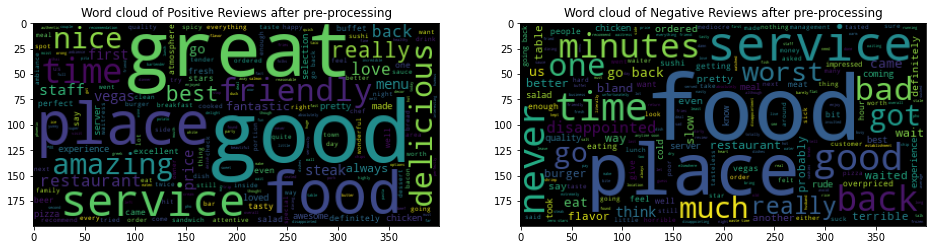

In [102]:
plt.figure(figsize=(16,12))
plt.subplot(121)  # 1 Indicates axis 1 image, 2 Indicates 2 sub images, Last 1 indicates 1st image out of two.
plt.title("Word cloud of Positive Reviews after pre-processing")
plt.imshow(positive_review_cloud)
plt.subplot(122)
plt.title("Word cloud of Negative Reviews after pre-processing")
plt.imshow(negative_review_cloud)

# Bag Of Words

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english',max_features=2500,ngram_range=(1,2))
scaled_X = cv.fit_transform(df.Review)

In [14]:
df_bow_sklearn = pd.DataFrame(scaled_X.toarray(),columns=cv.get_feature_names())
df_bow_sklearn.head()

c:\Users\LAP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,absolutely,absolutely amazing,acknowledged,actually,added,ago,amazing,ambiance,ambience,anytime,...,yukon gold,yum,yum sauce,yum yum,yummy,yummy christmas,yummy try,yummy tummy,zero,zero star
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_bow_sklearn,df['Liked'],test_size=0.3,random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
clf.score(X_train, y_train)

0.9971428571428571

In [21]:
clf.score(X_test,y_test)

0.7366666666666667

# TF-IDF

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(ngram_range=(1,3),max_features=2500)
scaled_X_tf =  tf_idf.fit_transform(df.Review)

In [73]:
df_tfidf_sklearn = pd.DataFrame(scaled_X_tf.toarray(),columns=tf_idf.get_feature_names())
df_tfidf_sklearn.head()

c:\Users\LAP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,absolutely,absolutely amazing,acknowledged,actually,added,ago,almost,also,also taste,although,...,wow,wrap,wrong,year,year ago,yet,yum,yummy,zero,zero star
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.572716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
# train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_tfidf_sklearn,df['Liked'],test_size=0.3,random_state=42)

In [75]:
from sklearn.ensemble import RandomForestClassifier
clf_tfidf = RandomForestClassifier()
clf_tfidf.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
clf_tfidf.score(X_train,y_train)

0.9957142857142857

In [79]:
clf_tfidf.score(X_test,y_test)

0.7366666666666667

In [ ]:
# This is not a Good model, So we have to change algorithms and Try BOW, Word2Vec to find an optimal model.

# Word2Vec

In [22]:
df.head()

,Review,Liked
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great price,1


In [23]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
Likedlist=[]
words=[]
for sent,classVal in zip(df['Review'],df['Liked']):
    sent_token = sent_tokenize(sent)
    
    for sent in sent_token:
        words.append(simple_preprocess(sent))
        Likedlist.append(classVal)

In [24]:
words[:5]

[['wow', 'loved', 'place'],
 ['crust', 'good'],
 ['tasty', 'texture', 'nasty'],
 ['stopped',
  'late',
  'may',
  'bank',
  'holiday',
  'rick',
  'steve',
  'recommendation',
  'loved'],
 ['selection', 'menu', 'great', 'price']]

In [25]:
import gensim
model = gensim.models.Word2Vec(words,window=5,min_count=2)

In [26]:
len(words)

999

In [27]:
model.corpus_count

999

In [28]:
df.shape

(1000, 2)

In [30]:
model.epochs

5

In [37]:
model.wv.similar_by_word('awesome')

[('back', 0.3845595419406891),
 ('time', 0.33410200476646423),
 ('marrow', 0.3312015235424042),
 ('sushi', 0.3224453926086426),
 ('hard', 0.31739863753318787),
 ('fresh', 0.30319875478744507),
 ('helpful', 0.29591843485832214),
 ('large', 0.28696826100349426),
 ('come', 0.2849105894565582),
 ('business', 0.2816283106803894)]

In [43]:
model.wv['tasty']

array([ 0.00529727,  0.00769893,  0.00628539, -0.00898781,  0.00957766,
       -0.01017011,  0.00157377,  0.0031498 ,  0.0060269 , -0.00959012,
        0.00253102, -0.0082913 , -0.0006484 ,  0.00767678, -0.00910792,
        0.00892218, -0.00895864,  0.00547283, -0.00883693, -0.00945564,
       -0.00735013,  0.00694274, -0.00232812,  0.00051718, -0.00983112,
        0.01049926,  0.00159915, -0.00577218, -0.00408705,  0.00846872,
        0.00466761, -0.00872245,  0.00363395, -0.00620781,  0.00074668,
        0.01024718, -0.00182758, -0.00120486,  0.00535393, -0.00892584,
        0.00401931,  0.00250527, -0.00957745, -0.00393563,  0.00949857,
        0.00178198,  0.00801852, -0.00188226,  0.00949022, -0.00755614,
        0.0057406 , -0.01017378,  0.00268608,  0.00836832, -0.00329994,
        0.0079078 , -0.00864951, -0.00120241,  0.00230475, -0.00506001,
        0.00762528, -0.00691621, -0.00147559,  0.00830534,  0.00561127,
        0.0013678 ,  0.01066961, -0.0079003 , -0.00528354,  0.00

In [44]:
def avg_word2vec(doc):
    val=[model.wv[word] for word in doc if word in model.wv.index_to_key]
    if len(val) !=0:
        outResult = np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
    else:
        outResult=np.asarray([])
    return outResult

In [45]:
X=[]
for i in  range(len(words)):
    X.append(avg_word2vec(words[i]))

In [46]:
X = [arr.tolist() for arr in X]

In [49]:
Final_X=[]
labels_y=[]
for X_val,classVal in zip(X,Likedlist):
    if len(X_val)!=0:
        Final_X.append(X_val)
        labels_y.append(classVal)

In [50]:
len(Final_X)

989

In [52]:
df = pd.DataFrame(Final_X)
df[100]=labels_y

In [53]:
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.001425,0.002644,-0.000765,-0.001008,0.003258,-0.003499,0.001383,0.007707,-0.002320,-0.004093,...,0.004076,0.002285,-0.002258,-0.000221,0.004474,-0.000931,-0.003723,-0.001635,0.002110,1
1,0.001888,-0.000364,-0.003375,0.003168,0.006507,-0.002094,0.000518,0.000396,-0.009814,-0.001613,...,0.001842,0.005394,-0.000775,0.003368,0.006574,0.005909,-0.005608,0.002940,-0.002318,0
2,0.001255,0.005117,0.000387,-0.000594,0.002967,-0.008735,-0.000245,0.006235,0.003920,-0.007457,...,-0.001421,0.002396,0.002167,0.002124,0.000011,-0.001230,-0.006800,0.008175,-0.002048,0
3,0.002331,-0.000258,0.000515,-0.005063,-0.002539,-0.002335,0.005799,0.004147,-0.002254,-0.001403,...,-0.004029,0.004755,-0.003985,0.000535,0.002645,-0.000314,-0.004423,0.001916,-0.001654,1
4,-0.003413,0.001692,-0.002582,0.003460,0.005464,-0.001798,0.001375,0.009303,-0.001691,0.001581,...,-0.000807,0.001907,0.002587,0.004508,0.004431,-0.000218,0.000367,0.005911,-0.004352,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,0.000105,0.001138,0.002630,0.004316,-0.004162,-0.006288,-0.000757,0.006233,-0.002647,-0.001799,...,-0.002860,-0.001078,0.004822,0.001573,0.005884,-0.007056,-0.002508,0.000223,-0.000675,0
985,-0.007587,-0.001836,0.004703,-0.002593,-0.001353,-0.003740,0.003368,0.007305,0.005894,-0.003091,...,0.004691,-0.000067,-0.004625,-0.006710,0.000898,0.004768,0.005857,-0.005489,-0.009843,0
986,-0.002468,0.005061,0.002711,-0.001463,0.000150,-0.003522,0.003242,0.005208,-0.002666,-0.001731,...,0.000431,-0.002391,-0.001628,0.006613,0.003496,-0.000337,-0.003863,0.001805,-0.005976,0
987,-0.003395,0.002752,0.002544,0.002359,0.000800,-0.001685,0.000017,0.001771,-0.002711,0.002259,...,0.001328,-0.000529,0.000218,0.005317,0.005460,0.002588,-0.000962,0.003110,-0.001590,0


In [54]:
# train Test split

X_cleaned = df.drop([100],axis=1)
y_cleaned=df[100]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_cleaned,y_cleaned,test_size=0.3,random_state=42)

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf_word2vec = RandomForestClassifier()
clf_word2vec.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
clf_word2vec.score(X_train,y_train)

0.9956647398843931

In [58]:
clf_word2vec.score(X_test,y_test)

0.6666666666666666

# Sentiment Analysis

In [80]:
def predict_statement(sample_review):
    text = remove_punch(sample_review)
    text = remove_whitespace(text)
    text = remove_stopwords(text)
    text = remove_digits(text)
    text = remove_whitespace(text)
    text = lemma(text)
    temp = tf_idf.transform([text]).toarray()
    out = clf_tfidf.predict(temp)
    print(out[0])
    return out[0]

In [81]:
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_statement(sample_review):
    print("This is a POSITIVE Review...")
else:
    print("This is a NEGATIVE Review...")

0
This is a NEGATIVE Review...


c:\Users\LAP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
